In [1]:
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
df = pd.read_csv (r'C:\Users\OLUFUNMILAYO\Downloads\Arrest_Data_from_2010_to_2019.csv')   #read the csv file (put 'r' before the path string to address any special characters, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
3,5615701,04/30/2019,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
4,5615929,04/30/2019,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [4]:
df.shape

(1310127, 17)

In [10]:
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,2019-05-03,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,2019-04-29,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5615197,2019-04-30,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
3,5615701,2019-04-30,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
4,5615929,2019-04-30,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [11]:
df['year_only'] = df['Arrest Date'].dt.year
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
0,191811472,2019-05-03,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)",2019
1,5614161,2019-04-29,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)",2019
2,5615197,2019-04-30,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)",2019
3,5615701,2019-04-30,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)",2019
4,5615929,2019-04-30,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)",2019


In [12]:
# select column
dffelonycharge = df[(df['Arrest Type Code']=='F')]

In [13]:
dffelonycharge.shape

(417549, 18)

In [15]:
dffelonycharge.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
1,5614161,2019-04-29,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)",2019
2,5615197,2019-04-30,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)",2019
4,5615929,2019-04-30,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)",2019
151,4738682,2016-08-01,1835.0,6,Hollywood,645,32,F,O,10.0,Fraud/Embezzlement,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,1700 N HIGHLAND AV,NaN,"(34.1006, -118.3417)",2016
152,4738771,2016-08-01,1835.0,6,Hollywood,645,44,M,O,10.0,Fraud/Embezzlement,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,1700 N HIGHLAND AV,NaN,"(34.1006, -118.3417)",2016


In [16]:

dffelonycharge_1 =dffelonycharge[(dffelonycharge['year_only']==2010)|(dffelonycharge['year_only']==2011)|(dffelonycharge['year_only']==2012)|(dffelonycharge['year_only']==2013)|(dffelonycharge['year_only']==2014)|(dffelonycharge['year_only']==2015)|(dffelonycharge['year_only']==2016)|(dffelonycharge['year_only']==2017)|(dffelonycharge['year_only']==2018)]

In [18]:
dffelonycharge_1.shape

(388868, 18)

In [17]:
dffelonycharge_1.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
151,4738682,2016-08-01,1835.0,6,Hollywood,645,32,F,O,10.0,Fraud/Embezzlement,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,1700 N HIGHLAND AV,NaN,"(34.1006, -118.3417)",2016
152,4738771,2016-08-01,1835.0,6,Hollywood,645,44,M,O,10.0,Fraud/Embezzlement,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,1700 N HIGHLAND AV,NaN,"(34.1006, -118.3417)",2016
153,4988057,2017-05-14,2215.0,7,Wilshire,755,48,M,W,11.0,Receive Stolen Property,F,496(A)PC,RECEIVING KNOWN STOLEN PROPERTY >$950,PACKARD,RIDGELEY,"(34.051, -118.3548)",2017
154,5060090,2017-08-01,2305.0,18,Southeast,1835,43,M,B,8.0,Other Assaults,F,422(A)PC,TERRORIZE CAUSING FEAR,10400 ZAMORA AV,NaN,"(33.9424, -118.2517)",2017
155,5165092,2017-11-27,2215.0,7,Wilshire,713,26,M,B,11.0,Receive Stolen Property,F,496(A)PC,RECEIVING KNOWN STOLEN PROPERTY >$950,BEVERLY BL,FAIRFAX AV,"(34.0761, -118.3614)",2017


In [20]:
dffelonycharge_1.describe()

,Report ID,Time,Area ID,Reporting District,Age,Charge Group Code,year_only
count,3.888680e+05,388866.000000,388868.000000,388868.000000,388868.000000,387514.000000,388868.000000
mean,4.014342e+06,1388.484007,10.518217,1098.914246,33.026166,11.755596,2013.624456
std,5.336243e+06,668.294682,6.266350,624.920480,12.612473,7.273896,2.550008
min,1.089278e+06,1.000000,1.000000,100.000000,0.000000,1.000000,2010.000000
25%,2.967192e+06,935.000000,5.000000,515.000000,23.000000,4.000000,2011.000000
50%,3.781626e+06,1515.000000,11.000000,1183.000000,30.000000,12.000000,2013.000000
75%,4.641872e+06,1935.000000,16.000000,1623.000000,42.000000,16.000000,2016.000000
max,1.821176e+08,2400.000000,21.000000,2198.000000,96.000000,99.000000,2018.000000


In [22]:
dffelonycharge_2 = dffelonycharge_1.groupby(['year_only']).count().reset_index()

In [23]:
dffelonycharge_2.head()

,year_only,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,2010,51157,51157,51157,51157,51157,51157,51157,51157,51157,50955,50955,51157,51157,50955,51157,23347,51157
1,2011,49830,49830,49829,49830,49830,49830,49830,49830,49830,49682,49682,49830,49830,49682,49830,23276,49830
2,2012,50610,50610,50610,50610,50610,50610,50610,50610,50610,50469,50466,50610,50610,50469,50610,24133,50610
3,2013,47882,47882,47882,47882,47882,47882,47882,47882,47882,47755,47754,47882,47882,47755,47882,22911,47882
4,2014,45878,45878,45877,45878,45878,45878,45878,45878,45878,45797,45797,45878,45878,45797,45878,22352,45878


In [24]:
dffelonycharge_2.drop(['Report ID','Arrest Date','Time','Area ID','Area Name','Age','Reporting District', 'Sex Code', 'Descent Code', 'Charge Group Code', 'Charge Group Description', 'Charge', 'Charge Description', 'Address', 'Cross Street',
   'Location'], axis=1, inplace=True)

In [25]:
dffelonycharge_2.head()

,year_only,Arrest Type Code
0,2010,51157
1,2011,49830
2,2012,50610
3,2013,47882
4,2014,45878


In [26]:
dffelonycharge_2.describe()

,year_only,Arrest Type Code
count,9.000000,9.000000
mean,2014.000000,43207.555556
std,2.738613,7138.270136
min,2010.000000,34948.000000
25%,2012.000000,35974.000000
50%,2014.000000,45878.000000
75%,2016.000000,49830.000000
max,2018.000000,51157.000000


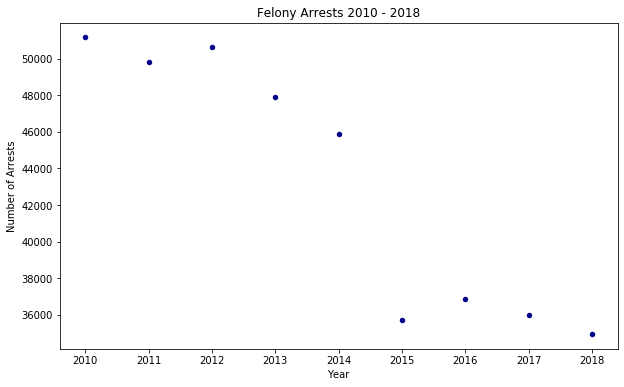

In [27]:
dffelonycharge_2.plot(kind='scatter', x='year_only', y='Arrest Type Code', figsize=(10, 6), color='darkblue')

plt.title('Felony Arrests 2010 - 2018')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')

plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
X = dffelonycharge_2[['year_only']]
y = dffelonycharge_2['Arrest Type Code']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Coefficients:  [-2440.42465753]
Intercept:  4957529.315068493


In [45]:
tdi2019 = 4957529.315068493 + (-2440.42465753*2019)

In [46]:
tdi2019

30311.93151542265

In [47]:
dffelonycharge_2

,year_only,Arrest Type Code
0,2010,51157
1,2011,49830
2,2012,50610
3,2013,47882
4,2014,45878
5,2015,35709
6,2016,36880
7,2017,35974
8,2018,34948


In [52]:
dffelonycharge_5 = dffelonycharge.groupby(['year_only']).count().reset_index()

In [53]:
dffelonycharge_5

,year_only,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,2010,51157,51157,51157,51157,51157,51157,51157,51157,51157,50955,50955,51157,51157,50955,51157,23347,51157
1,2011,49830,49830,49829,49830,49830,49830,49830,49830,49830,49682,49682,49830,49830,49682,49830,23276,49830
2,2012,50610,50610,50610,50610,50610,50610,50610,50610,50610,50469,50466,50610,50610,50469,50610,24133,50610
3,2013,47882,47882,47882,47882,47882,47882,47882,47882,47882,47755,47754,47882,47882,47755,47882,22911,47882
4,2014,45878,45878,45877,45878,45878,45878,45878,45878,45878,45797,45797,45878,45878,45797,45878,22352,45878
5,2015,35709,35709,35709,35709,35709,35709,35709,35709,35709,35655,35655,35709,35709,35655,35709,16024,35709
6,2016,36880,36880,36880,36880,36880,36880,36880,36880,36880,36634,36633,36880,36880,36634,36880,16732,36880
7,2017,35974,35974,35974,35974,35974,35974,35974,35974,35974,35808,35808,35974,35974,35808,35974,16504,35974
8,2018,34948,34948,34948,34948,34948,34948,34948,34948,34948,34759,34757,34948,34948,34759,34948,16085,34948
9,2019,28681,28681,28681,28681,28681,28681,28681,28681,28681,28587,28587,28681,28681,28587,28681,12988,28681


In [5]:
dftricharge_0 = df.groupby(['Arrest Type Code']).count().reset_index()

In [6]:
dftricharge_0 

,Arrest Type Code,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Charge,Charge Description,Address,Cross Street,Location
0,D,11111,11111,11111,11111,11111,11111,11111,11111,11111,7319,7319,11111,7319,11111,1049,11111
1,F,417549,417549,417547,417549,417549,417549,417549,417549,417549,416101,416094,417549,416101,417549,194352,417549
2,I,54994,54994,54951,54994,54994,54994,54994,54994,54994,26082,26078,54994,26093,54994,42118,54994
3,M,798266,798266,798116,798266,798266,798266,798266,798266,798266,746833,746323,798266,746864,798266,494286,798266
4,O,28207,28207,28207,28207,28207,28207,28207,28207,28207,25763,25763,28207,25763,28207,15856,28207
